In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
import pandas as pd

# Set Pandas to display all columns in a single row
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


In [21]:
df=pd.read_csv("C:\\Users\\DELL\\Downloads\\Customer Churn.csv")
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL             No   
1             Yes  

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#total charge are in object so we have to convert into float
#there are some nan value in total charge we have to replace with 0

In [50]:

df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")


now let see how many null value we have in our column

In [48]:
df.isnull().sum().sum()

0

In [46]:
df.describe()
df['customerID'].duplicated().sum()

0

converted 0 and 1 value of senior citizen into no and yes

In [52]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

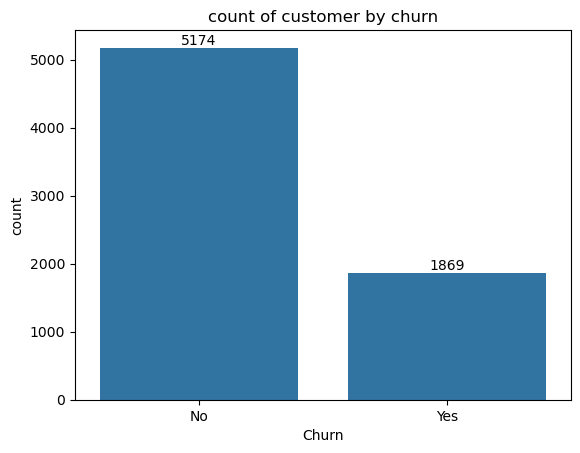

In [80]:
ax=sns.countplot(data=df,x="Churn")
ax.bar_label(ax.containers [0])
plt.title("count of customer by churn")
plt.show()

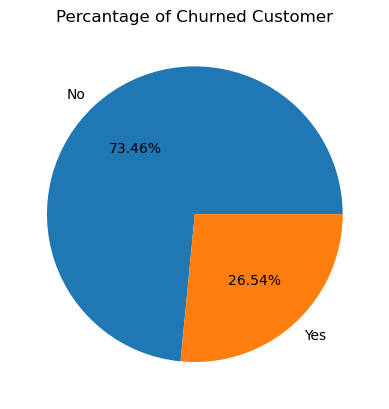

In [102]:

gb=df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"],labels=gb.index,autopct="%1.2f%%")
plt.title("Percantage of Churned Customer")
plt.show()

FROM THE GIVEN PIE CHART WE CAN AY THAT 26 PERCENT OUR CUSTOMER
ARE CHURNED OUT

NOW WE SEE REASON BEHIND IT

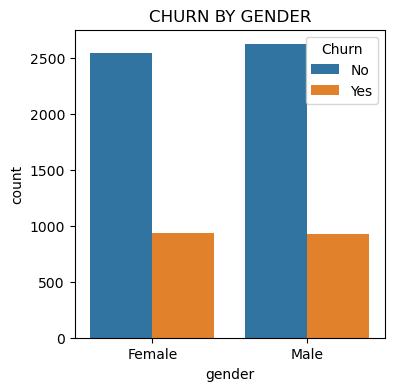

In [106]:
plt.figure(figsize=(4,4))
ds=sns.countplot(data=df,x="gender",hue="Churn")

plt.title("CHURN BY GENDER")
plt.show()

now lets calculate churn by customer

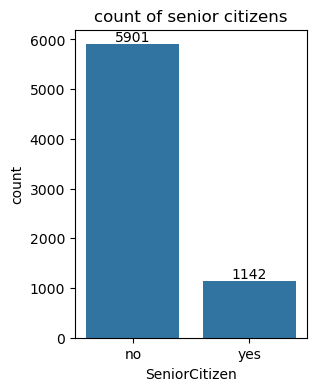

In [126]:
plt.figure(figsize=(3,4))
sd=sns.countplot(data=df,x="SeniorCitizen")
sd.bar_label(sd.containers[0])
plt.title("count of senior citizens")
plt.show()

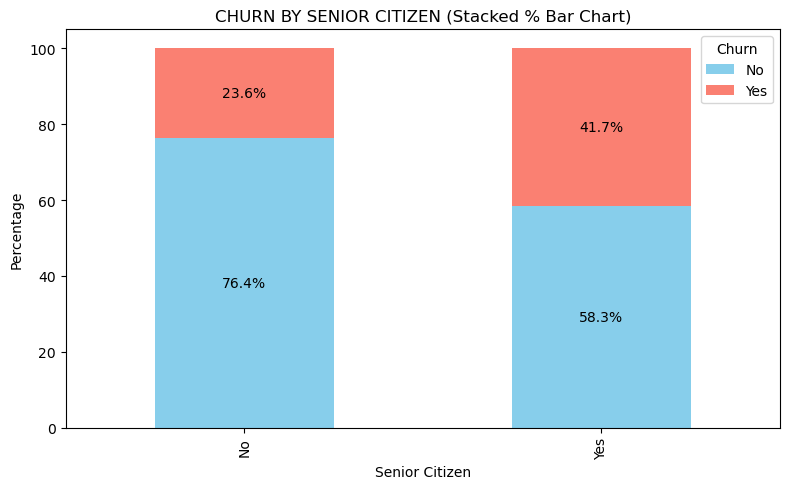

In [116]:
import pandas as pd
import matplotlib.pyplot as plt


grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)


percent = grouped.div(grouped.sum(axis=1), axis=0) * 100


colors = ['skyblue', 'salmon']
percent.plot(kind='bar', stacked=True, color=colors, figsize=(8, 5))


for i, (index, row) in enumerate(percent.iterrows()):
    cumulative = 0
    for j, val in enumerate(row):
        plt.text(i, cumulative + val / 2, f'{val:.1f}%', ha='center', va='center', color='black')
        cumulative += val


plt.title("CHURN BY SENIOR CITIZEN (Stacked % Bar Chart)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.xticks(ticks=range(len(percent.index)), labels=['No', 'Yes'])
plt.legend(title="Churn", loc="upper right")
plt.tight_layout()
plt.show()


senior citizen me bahut saare log churned kiye hain

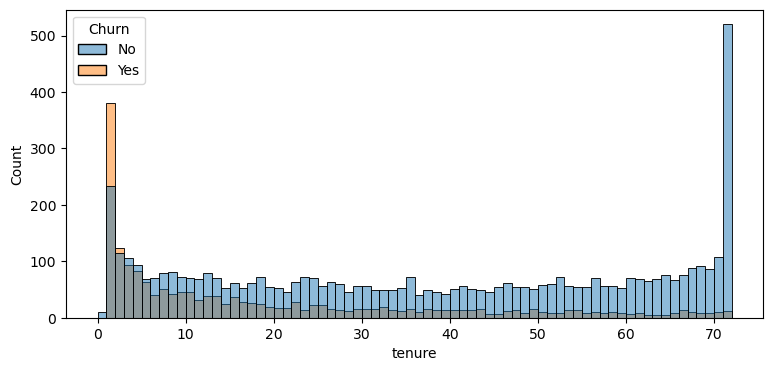

In [131]:
plt.figure(figsize=(9,4))
sns.histplot(data=df,x="tenure",hue="Churn",bins=72)
plt.show()

people who used our service for long time they stayed
and the people who used our service for 1 and 2 month are churned

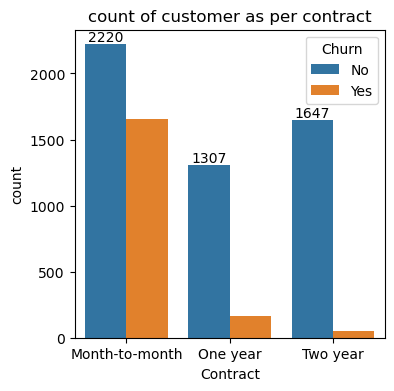

In [144]:
plt.figure(figsize=(4,4))
de=sns.countplot(data=df,x="Contract",hue="Churn")
de.bar_label(de.containers[0])
plt.title("count of customer as per contract")
plt.show()

jo log ek month ka contract liye hain wo jaldi churned out 
kar rahe hain 

In [149]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

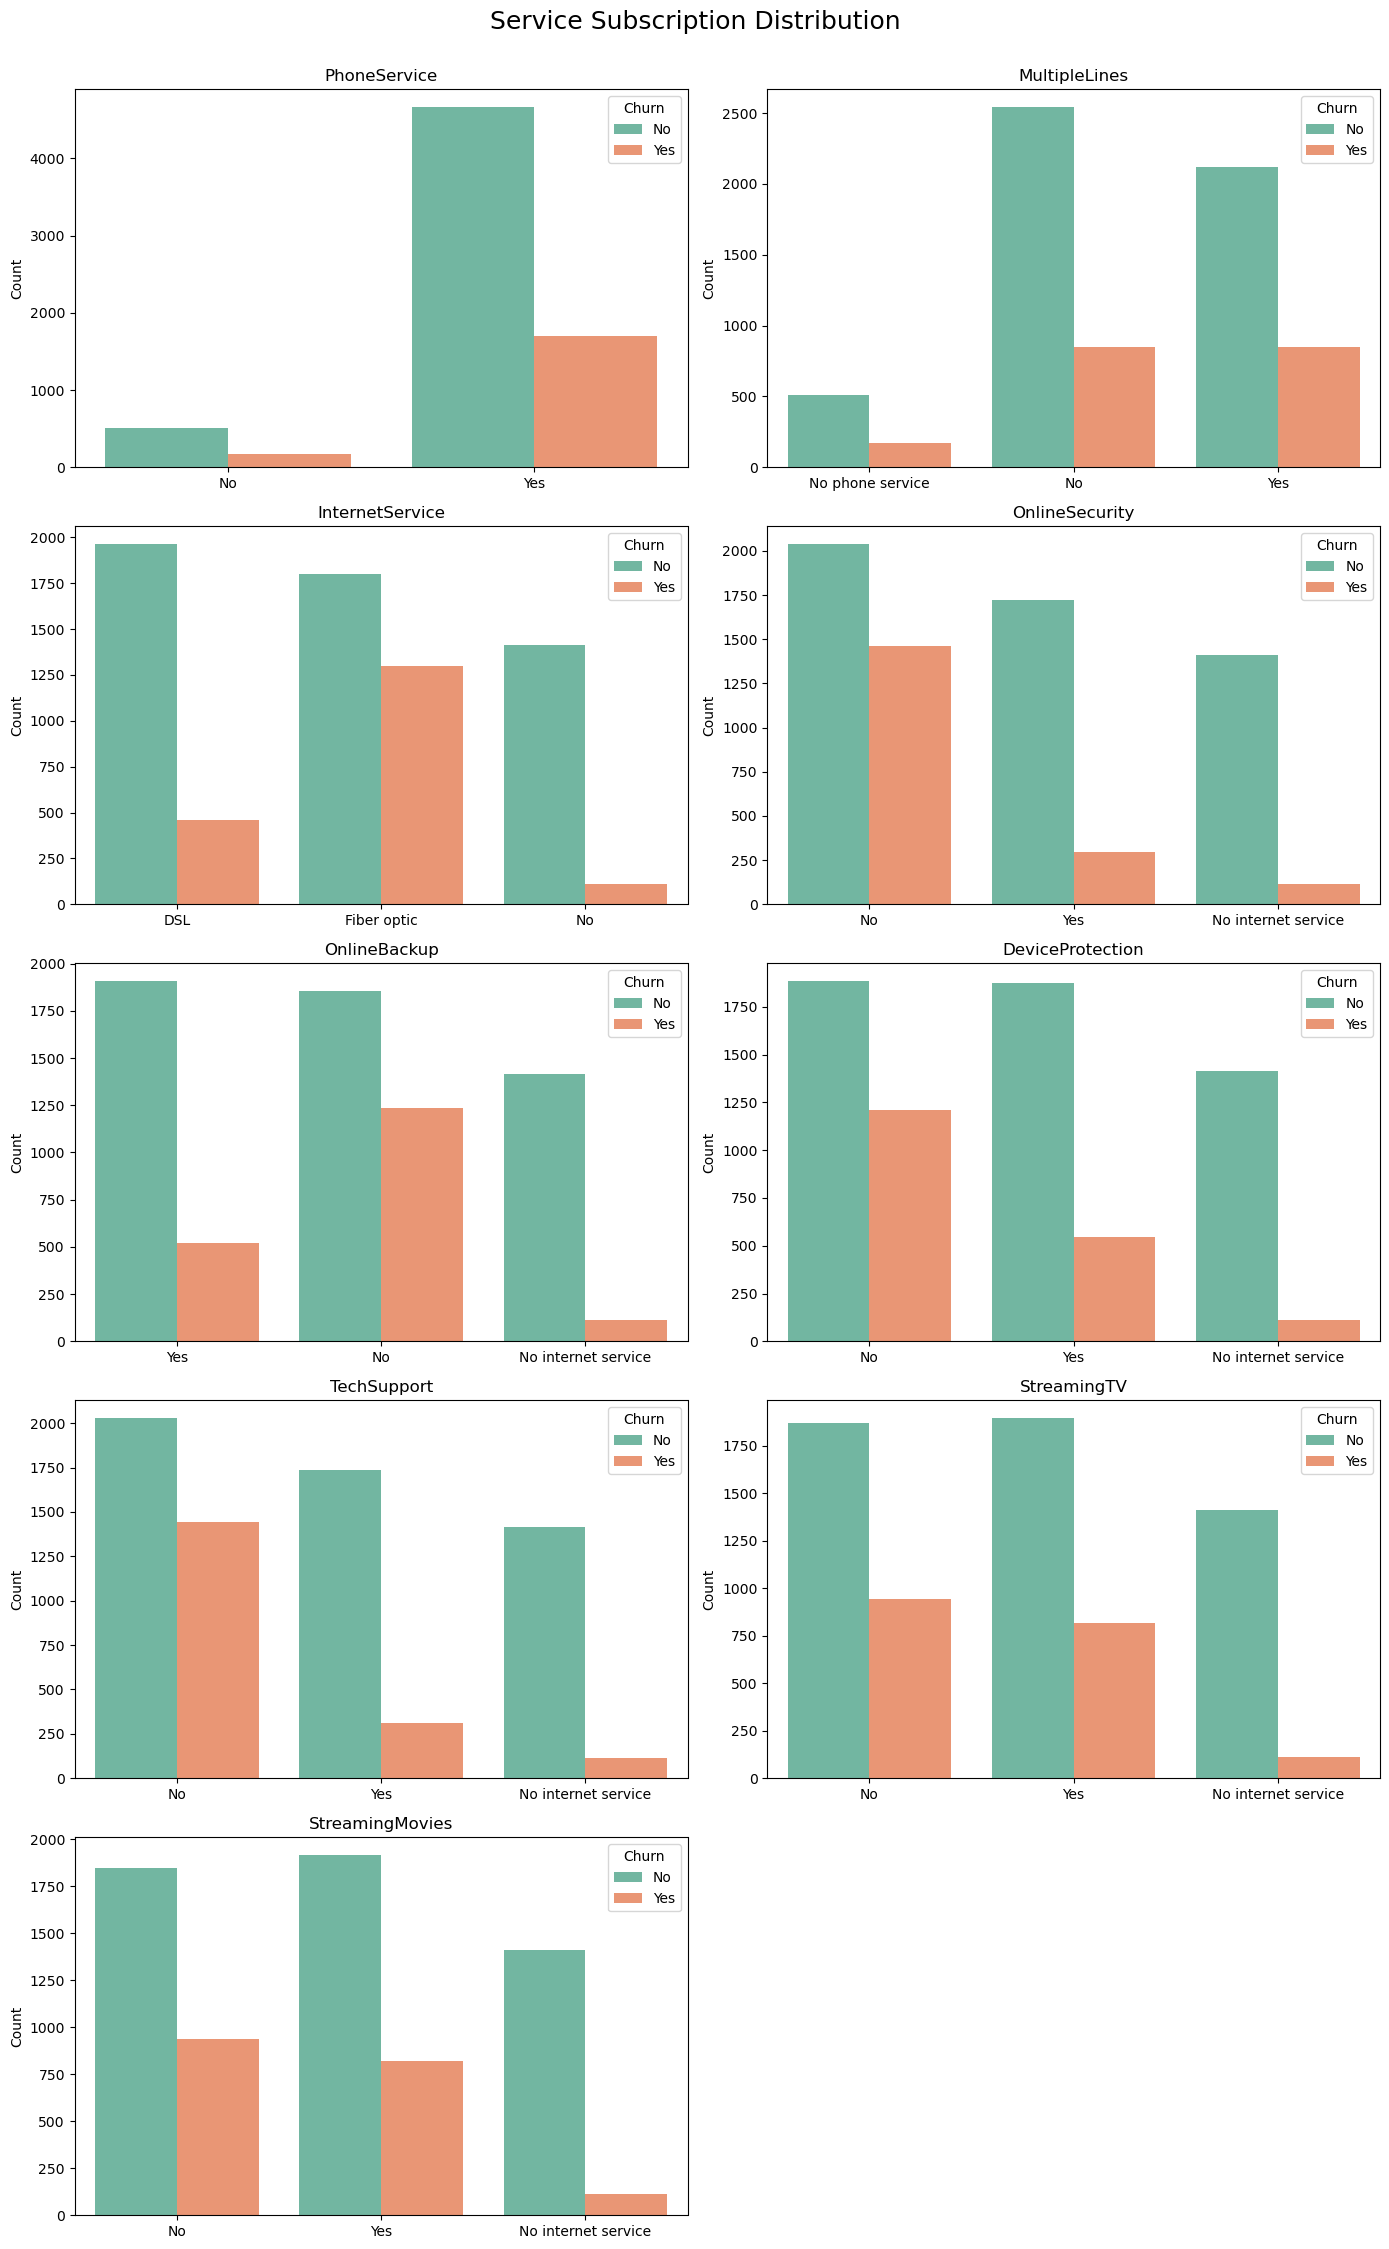

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of service-related columns
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the subplot grid (5 rows x 2 columns)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 22))
axes = axes.flatten()

# Loop through columns and plot each on a subplot
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette="Set2",hue=df["Churn"])
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Hide any unused axes (if columns < 10)
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

# Layout adjustments
plt.tight_layout()
plt.suptitle('Service Subscription Distribution', fontsize=18, y=1.02)
plt.show()


the majority of customer who do not churn tend to have servic like phone
service  internet service and online security enabled.for service
like online backup tech support and streaming tv churn rate are higher


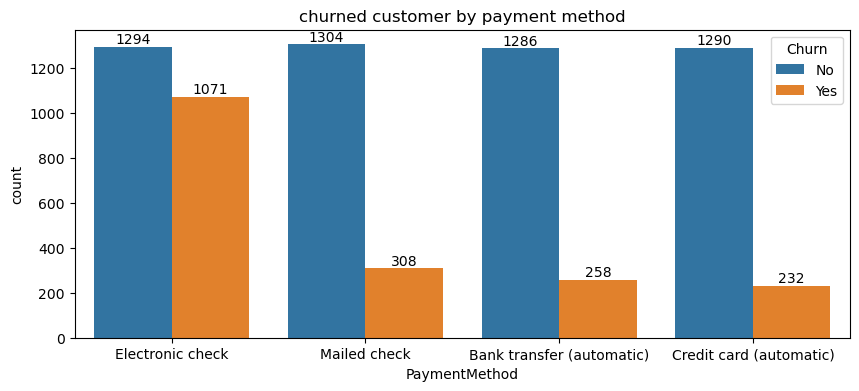

In [169]:
plt.figure(figsize=(10,4))
ax=sns.countplot(data=df,x="PaymentMethod",hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("churned customer by payment method")
plt.show()

In [ ]:
customer is likely to churn when he use electronic check